## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import training data

In [2]:
df_train = pd.read_csv(r"C:\Users\dell\Downloads\Train (4).csv")
df_train.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


## Explore training data

In [3]:
df_train.shape

(3132, 9)

In [4]:
df_train.describe()

,B,C,D,E,F,G,H,Target
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.525750,0.409254,0.140070,0.834224,0.362219,0.181684,0.240351,9.964879
std,0.119131,0.098557,0.042661,0.491449,0.223000,0.109317,0.139567,3.229146
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.444000,0.187000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.145000,0.804500,0.339500,0.171750,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.156750,0.506500,0.255000,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3132 non-null   object 
 1   B       3132 non-null   float64
 2   C       3132 non-null   float64
 3   D       3132 non-null   float64
 4   E       3132 non-null   float64
 5   F       3132 non-null   float64
 6   G       3132 non-null   float64
 7   H       3132 non-null   float64
 8   Target  3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [6]:
#check for null values
df_train.isnull().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
Target    0
dtype: int64

In [7]:
#check for duplicate values
df_train.duplicated().sum()

0

## Training data preprocessing

In [8]:
#changing categorical into numerical
df_train['A'].value_counts()

M    1149
I     992
F     991
Name: A, dtype: int64

In [9]:
df_train['A'].replace('M',0, inplace = True)
df_train['A'].replace('I',1, inplace = True)
df_train['A'].replace('F',2, inplace = True)

In [10]:
df_train.head(2)

,A,B,C,D,E,F,G,H,Target
0,2,0.615,0.455,0.135,1.059,0.4735,0.2630,0.274,9
1,2,0.515,0.395,0.140,0.686,0.2810,0.1255,0.220,12


## Importing testing data

In [11]:
df_test = pd.read_csv(r"C:\Users\dell\Downloads\Test (4).csv")
df_test.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


## Exploring testing data

In [12]:
df_test.shape

(1045, 9)

In [13]:
df_test.describe()

,Index,B,C,D,E,F,G,H
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,2024.866986,0.518722,0.403766,0.137856,0.812311,0.350821,0.177325,0.234275
std,1210.261892,0.122837,0.101194,0.039195,0.487063,0.218709,0.110489,0.138071
min,6.000000,0.110000,0.090000,0.015000,0.008000,0.002500,0.002000,0.003000
25%,1003.000000,0.445000,0.345000,0.110000,0.430500,0.177500,0.091500,0.127000
50%,2018.000000,0.535000,0.420000,0.140000,0.777500,0.329500,0.166000,0.225000
75%,3049.000000,0.610000,0.475000,0.165000,1.140000,0.491000,0.246000,0.323500
max,4176.000000,0.800000,0.630000,0.235000,2.526000,1.232000,0.590000,0.850000


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1045 non-null   int64  
 1   A       1045 non-null   object 
 2   B       1045 non-null   float64
 3   C       1045 non-null   float64
 4   D       1045 non-null   float64
 5   E       1045 non-null   float64
 6   F       1045 non-null   float64
 7   G       1045 non-null   float64
 8   H       1045 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 73.6+ KB


In [15]:
#check for null values
df_test.isnull().sum()

Index    0
A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
dtype: int64

In [16]:
#check for duplicate values
df_test.duplicated().sum()

0

## Testing data preprocessing

In [17]:
#changing categorical into numerical
df_test['A'].replace('M',0, inplace = True)
df_test['A'].replace('I',1, inplace = True)
df_test['A'].replace('F',2, inplace = True)

In [18]:
#removing unnecessary columns
del df_test['Index']
df_test.head(2)

,A,B,C,D,E,F,G,H
0,0,0.605,0.455,0.16,1.1035,0.421,0.3015,0.325
1,0,0.590,0.440,0.15,0.8725,0.387,0.2150,0.245


## Importing target variable for testing

In [19]:
target = pd.read_csv(r"C:\Users\dell\Downloads\sample_submission (4).csv")
target.head()

,Index,Target
0,866,1
1,1483,1
2,599,1
3,1702,1
4,670,1


## Data Vizualization

<AxesSubplot:xlabel='A', ylabel='count'>

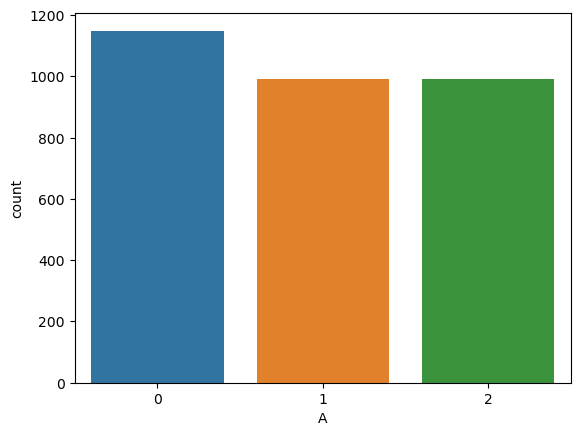

In [20]:
sns.countplot(df_train["A"])

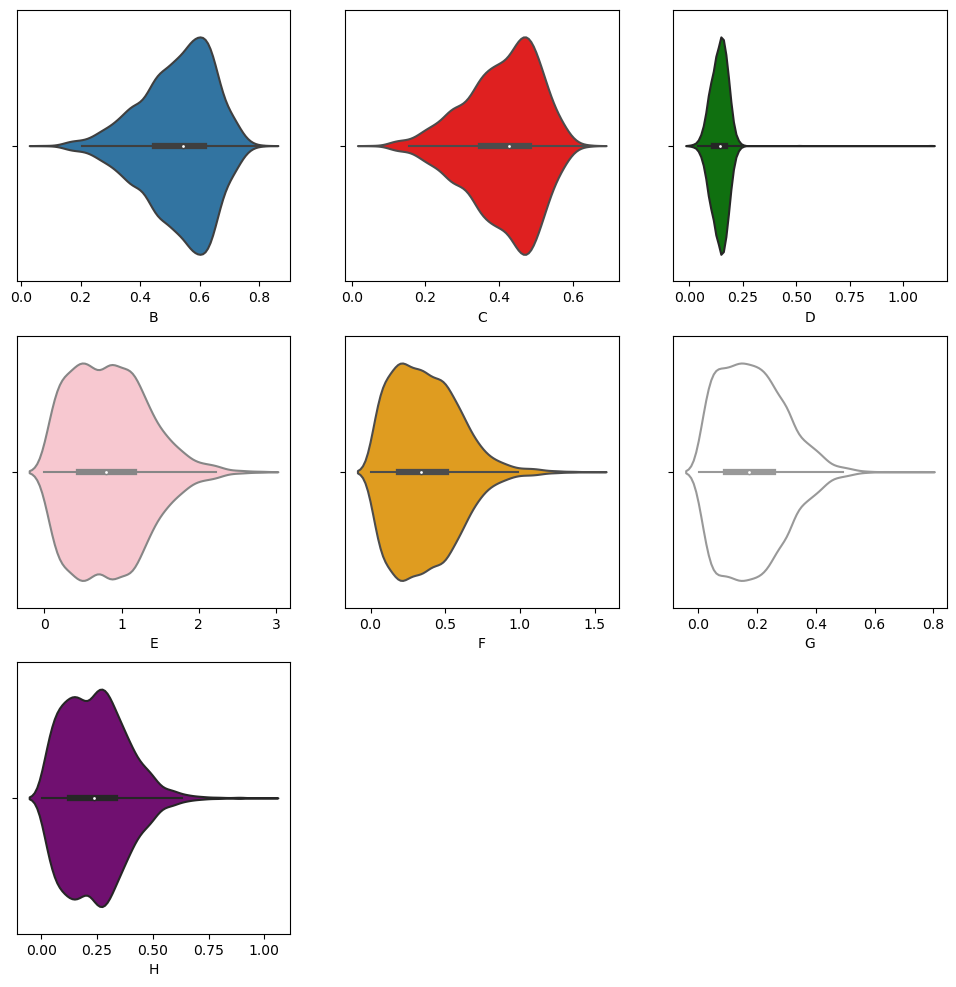

In [21]:
plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
sns.violinplot(df_train['B'])

plt.subplot(3,3,2)
sns.violinplot(df_train['C'], color = 'r')

plt.subplot(3,3,3)
sns.violinplot(df_train['D'], color = 'g')

plt.subplot(3,3,4)
sns.violinplot(df_train['E'], color = 'pink')

plt.subplot(3,3,5)
sns.violinplot(df_train['F'], color = 'orange')

plt.subplot(3,3,6)
sns.violinplot(df_train['G'], color = 'w')

plt.subplot(3,3,7)
sns.violinplot(df_train['H'], color = 'purple')

plt.show()

<AxesSubplot:>

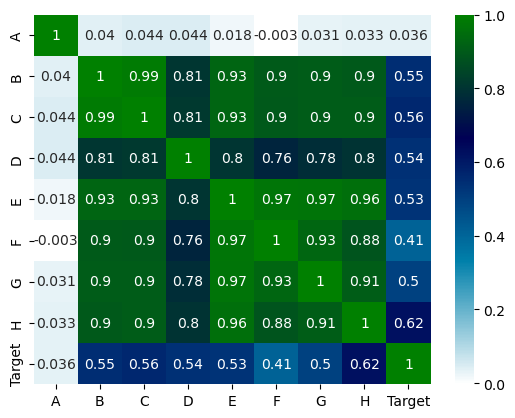

In [22]:
sns.heatmap(df_train.corr(), annot=True, cmap = 'ocean_r')

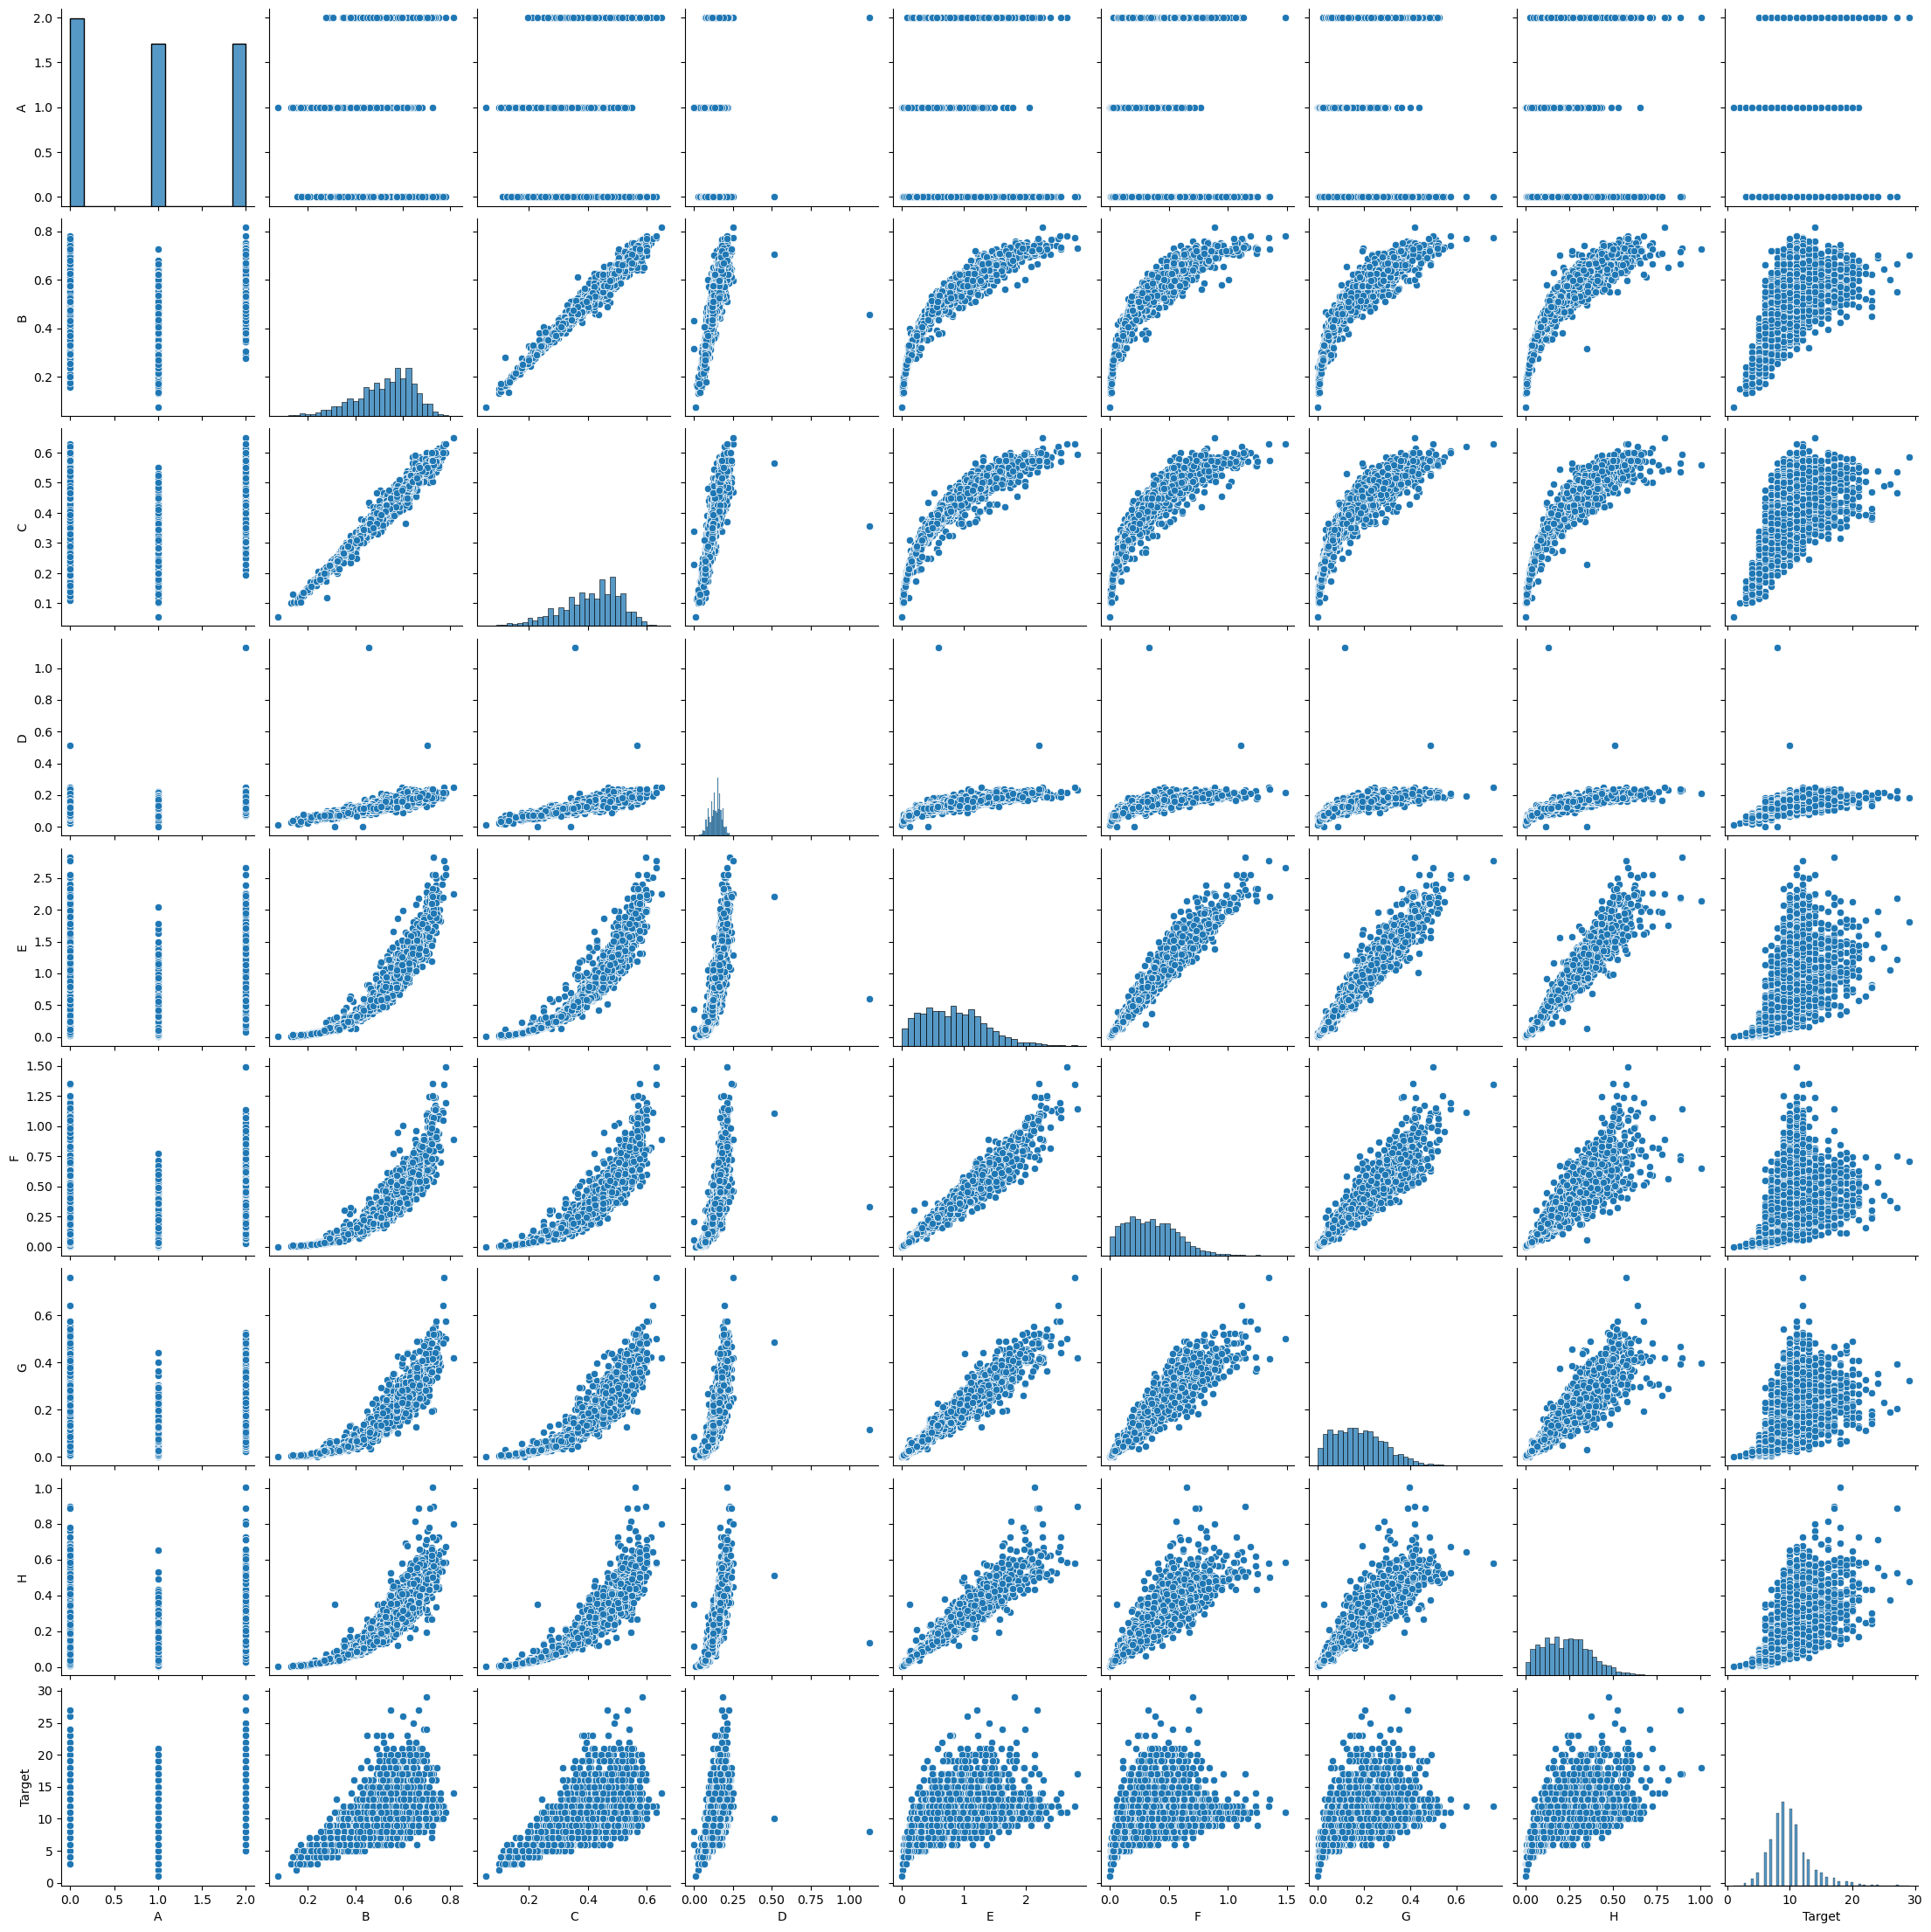

In [23]:
sns.pairplot(df_train)

## Model Building

### Multiple Linear Regression

In [24]:
#defining variables
xtrain = df_train.iloc[:,:-1]
ytrain = df_train["Target"]
xtest = df_test
ytest = target["Target"]

In [25]:
#fitting training data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain, ytrain)

LinearRegression()

In [26]:
#adding constant and creating fitted model
import statsmodels.api as sm
x_train = sm.add_constant(xtrain)
lm1 = sm.OLS(ytrain, x_train).fit()

In [27]:
#evaluation
lm1.params

const     3.007828
A        -0.081761
B        -1.372923
C        13.571308
D        11.191027
E         9.091978
F       -21.001989
G        -8.799486
H         9.386910
dtype: float64

In [28]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     433.0
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:48:36   Log-Likelihood:                -6946.3
No. Observations:                3132   AIC:                         1.391e+04
Df Residuals:                    3123   BIC:                         1.397e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0078      0.320      9.399      0.0

In [29]:
#prediction
ypred = lm.predict(xtest)
ypred = ypred.astype(int)
ypred

array([11, 10, 13, ..., 12, 10,  9])

In [30]:
#Evaluating Model using RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
print("RMSE is ", mse**0.5)

RMSE is  8.757279951737871


In [31]:
#Saving predictions in sample submission file
ypred_df = pd.DataFrame(ypred)
file6 = ypred_df.to_csv("Final Submission using Regression 16-6-23.csv", index = False)

file6 = pd.read_csv("Final Submission using Regression 16-6-23.csv")
file6 = pd.concat([target['Index'],ypred_df], axis = 1)
file6.columns = ["Index", "Target"]
file6.to_csv("Final Submission using Regression 16-6-23.csv", index = False)

### Lasso Regression

In [32]:
#fitting data
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(xtrain, ytrain)

Lasso()

In [33]:
#prediction
ypred_lasso = lasso.predict(xtest)
ypred_lasso = ypred_lasso.astype(int)
ypred_lasso

array([9, 9, 9, ..., 9, 9, 9])

In [34]:
#evaluation
mse_lasso = mean_squared_error(ytest, ypred_lasso)
print("RMSE after Lasso Regression is ", mse_lasso**0.5)

RMSE after Lasso Regression is  8.0


In [35]:
#Saving predictions in sample submission file
ypred_lasso_df = pd.DataFrame(ypred_lasso)
file7 = ypred_lasso_df.to_csv("Final Submission using Lasso Regression 16-6-23.csv", index = False)

file7 = pd.read_csv("Final Submission using Lasso Regression 16-6-23.csv")
file7 = pd.concat([target['Index'],ypred_lasso_df], axis = 1)
file7.columns = ["Index", "Target"]
file7.to_csv("Final Submission using Lasso Regression 16-6-23.csv", index = False)

### Ridge Regression

In [36]:
#fitting data
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(xtrain, ytrain)

Ridge()

In [37]:
#prediction
ypred_ridge = ridge.predict(xtest)
ypred_ridge = ypred_ridge.astype(int)
ypred_ridge

array([11, 10, 13, ..., 12, 10,  9])

In [38]:
#evaluation
mse_ridge = mean_squared_error(ytest, ypred_ridge)
print("RMSE after Ridge Regression is ", mse_ridge**0.5)

RMSE after Ridge Regression is  8.722406937028312


In [39]:
#Saving predictions in sample submission file
ypred_ridge_df = pd.DataFrame(ypred_ridge)
file8 = ypred_ridge_df.to_csv("Final Submission using Ridge Regression 16-6-23.csv", index = False)

file8 = pd.read_csv("Final Submission using Ridge Regression 16-6-23.csv")
file8 = pd.concat([target['Index'],ypred_ridge_df], axis = 1)
file8.columns = ["Index", "Target"]
file8.to_csv("Final Submission using Ridge Regression 16-6-23.csv", index = False)

## Reference

https://www.kaggle.com/competitions/practice-hackathon/data